# **Turma de Pós-Graduação de Ciência de Dados**

**Disciplina: Aplicações de Finanças**

**prof: Sérgio Assunção Monteiro, DSc**

**Conditional Value at Risk (CVaR)**

# **Critérios de Risco Coerente**

> 1.	Subaditividade: R(X + Y) < R(X) + R(Y). 
Ou seja, se adicionarmos dois portfólios, o risco total não pode ficar pior do que adicionar os dois riscos separadamente. 

> 2.	Monotonicidade: Se X ≤ Y para todos os cenários, então R(X) ≥ R(Y). 
Se um portfólio tiver valores melhores do que outro em todos os cenários, seu risco será melhor.

> 3.	Homogeneidade positiva: Para todo λ > 0, R(λX) = λR(X). 
Ou seja, quando aumentamos o tamanho de posição de uma carteira, o risco aumenta proporcionalmente.

> 4.	Invariância por translação: Para toda constante c, R(X + c) = R(X) — c. 
Exemplo: caso, simplesmente, adicionemos dinheiro a um portfólio, ele não conta na medida de risco.


# **Retorno**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

In [ ]:
n = 100
df = pd.DataFrame(dict(data=pd.date_range("2020-1-1", 
                                           periods=n),
                       valor=np.abs(np.random.normal(100, 5, n))))

In [ ]:
with pd.option_context('display.max_rows',10):
  print(df)

         data       valor
0  2020-01-01   98.246705
1  2020-01-02   92.354442
2  2020-01-03  101.700677
3  2020-01-04   92.651598
4  2020-01-05   95.653746
..        ...         ...
95 2020-04-05  105.623671
96 2020-04-06   95.968860
97 2020-04-07  107.640634
98 2020-04-08   93.470016
99 2020-04-09  103.939902

[100 rows x 2 columns]


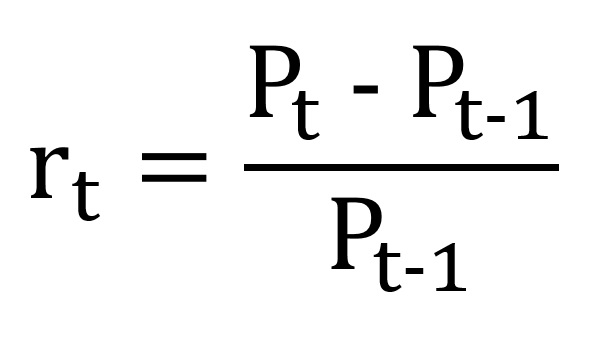

In [ ]:
retorno = (df['valor']/ df['valor'].shift(1)) -1
#Drop all Not a number values using drop method.
retorno.dropna(inplace = True)

In [ ]:
with pd.option_context('display.max_rows',10):
  print(retorno)

1    -0.059974
2     0.101200
3    -0.088978
4     0.032403
5     0.057644
        ...   
95    0.065753
96   -0.091408
97    0.121620
98   -0.131647
99    0.112013
Name: valor, Length: 99, dtype: float64


In [ ]:
retorno.describe()

count    99.000000
mean      0.003262
std       0.073984
min      -0.145095
25%      -0.055504
50%       0.005366
75%       0.045647
max       0.176169
Name: valor, dtype: float64

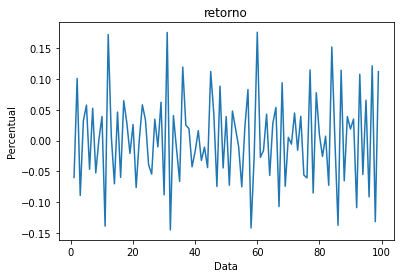

In [ ]:
retorno.plot(title="retorno",xlabel="Data", ylabel="Percentual")

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  


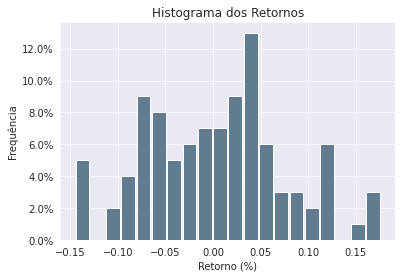

In [ ]:
from matplotlib.ticker import PercentFormatter
fig = plt.figure()
plt.title('Histograma dos Retornos')
plt.xlabel('Retorno (%)')
plt.ylabel('Frequência')
ax = fig.add_subplot(111)
ax.hist(retorno,bins=20,density=False,rwidth=0.9,color='#607c8e');
ax.yaxis.set_major_formatter(PercentFormatter(xmax=100))
plt.show()

# **Value at Risk (Var)**

**O Valor no Risco** - Value at Risk (VaR) é um limite
com um determinado nível de confiança de que as perdas
não vão exceder um certo nível histórico.

**O VaR** é comumente citado com quantis como 95, 99 e 99,9.

**Exemplo:**
VaR(95) = -2,3% que significa que: 
"95% de certeza de que as perdas não excederão -2,3% em um determinado
dia com base no histórico de valores".

In [ ]:
media = np.mean(retorno)
desvio_padrao = np.std(retorno)
nivel_de_confianca = 0.05
VaR = norm.ppf(nivel_de_confianca, media, desvio_padrao)
VaR

-0.11781584291923362

In [ ]:
nivel_do_var = 95
var_95 = np.percentile(retorno, 100 - nivel_do_var)
print('O VaR({}) é de: {}%'.format(nivel_do_var,100*var_95))

O VaR(95) é de: -11.119954660654836%


# **Conditional Value at Risk (CVar)**

**O Valor condicional em risco** - Conditional Value at Risk - é uma estimativa de perdas esperadas condicionada no pior (1 - x)% de cenários.

**CVaR** é comumente citado com quantis como 95, 99 e 99,9.

**Exemplo:** CVaR(95) = -2,5% significa que: "Nos piores 5% dos casos, as perdas, em média, excedem -2,5% dos valores históricos.

In [ ]:
nivel_do_var = 95
var_95 = np.percentile(retorno, 100 - nivel_do_var)
cvar_95 = retorno[retorno <= var_95].mean()
print('O CVaR({}) é de: {}%'.format(nivel_do_var,100*cvar_95))

O CVaR(95) é de: -13.904584045260682%


# **CVar para otimização de portfólio**

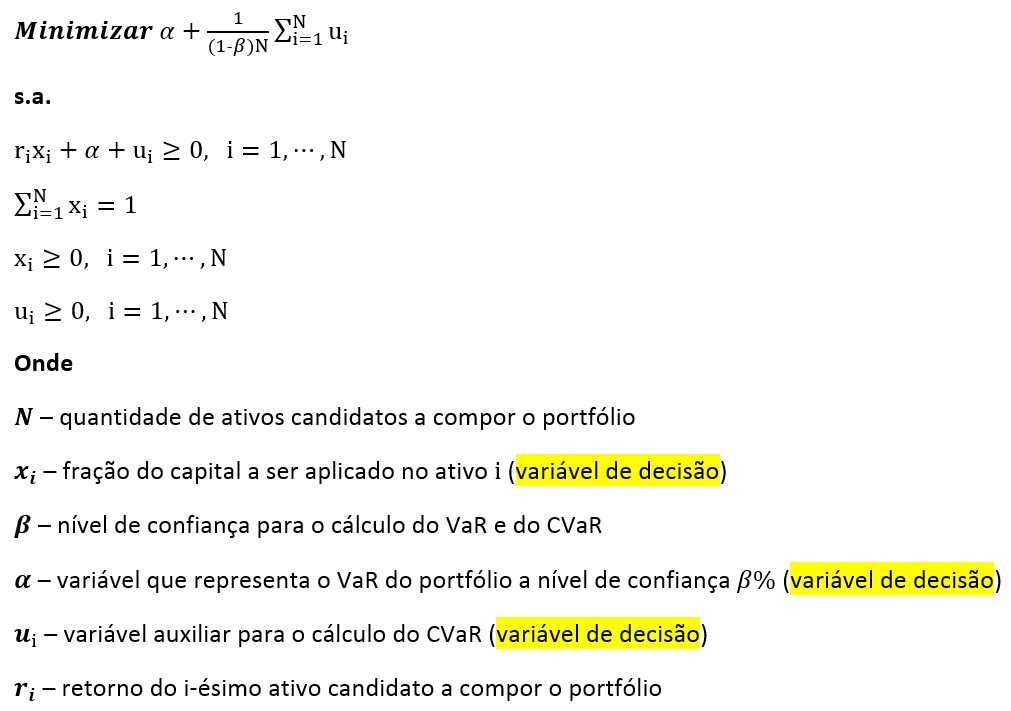

In [ ]:
import numpy as np
from scipy.optimize import linprog
from numpy.linalg import solve

In [ ]:
def resolverPL(c, A_eq, b_eq, A_ub, b_ub):
    res = linprog(c, A_eq=A_eq, b_eq=b_eq, A_ub=A_ub, b_ub=b_ub,
                  bounds=(0, None))
    return res

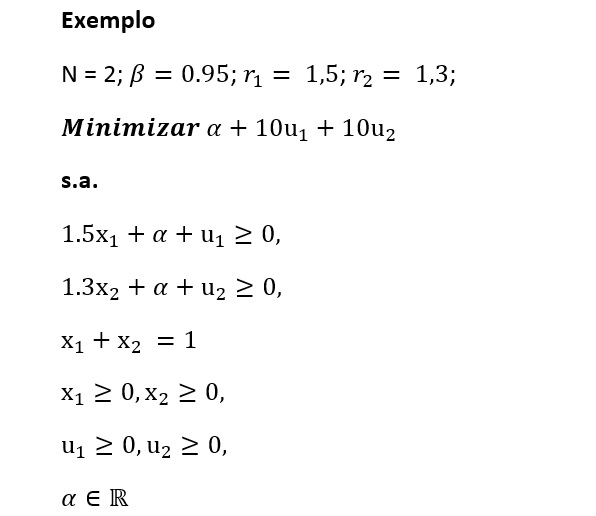

In [ ]:
def exemplo():
    A_ub = np.array([[-1.5, 0, -1, 0, -1, 1],
                     [0, -1.3, 0, -1, -1, 1]])
    b_ub = np.array([0, 0])
    A_eq = np.array([[1, 1, 0, 0, 0, 0]])
    b_eq = np.array([1])
    c = np.array([0, 0, 10, 10, 1, -1])
    return c, A_eq, b_eq, A_ub, b_ub

In [ ]:
[c, A_eq, b_eq, A_ub, b_ub]=exemplo();
resultado=resolverPL(c, A_eq, b_eq, A_ub, b_ub); #resolver PL
print('-----------------------------------------------------')
print("Os valores de x são:");
print('Percentual do investimento no ativo 1: {0:.4g}%'.format(100*resultado.x[0]))
print('Percentual do investimento no ativo 2: {0:.4g}%'.format(100*resultado.x[1]))
print('O VaR do portifólio é: {0:.4g}%'.format(100*(resultado.x[4]-resultado.x[5])))
print('-----------------------------------------------------')

-----------------------------------------------------
Os valores de x são:
Percentual do investimento no ativo 1: 46.43%
Percentual do investimento no ativo 2: 53.57%
O VaR do portifólio é: -69.64%
-----------------------------------------------------


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:87: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
